In [107]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [119]:
RG_reps = glob.glob('/media/stephen/Data/modelling-ctcf2/lammps/*/radius_of_gyration.txt')
mean_RG = np.mean(np.dstack([np.loadtxt(rep) for rep in RG_reps]), axis=2)

In [120]:
time = mean_RG[:,0]
RG = mean_RG[:,1]

In [121]:
dydx = np.diff(RG)/ np.diff(time)
midpoints = (time[1:] + time[:-1]) / 2

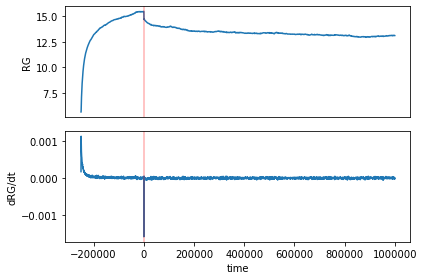

In [122]:
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.set_ylabel('RG')
ax1.plot(time, RG)
ax1.tick_params(axis='y')
ax1.get_xaxis().set_visible(False)
ax1.axvline(x=1, color='Red', alpha=0.3)

ax2.set_ylabel('dRG/dt')
ax2.plot(midpoints, dydx)
ax2.tick_params(axis='y')
ax2.set_xlabel('time')
ax2.axvline(x=1, color='Red', alpha=0.3)

fig.tight_layout()
plt.show()